<h2>Task 1</h2>

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz

X = np.linspace(-2, 2, 7)
y = X ** 3 # original dependecy 

plt.scatter(X, y)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$');

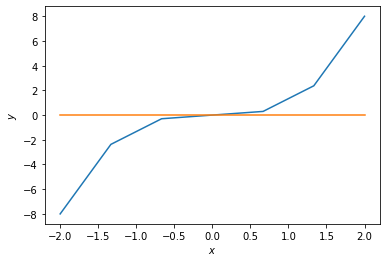

In [2]:
root = y
root_values = np.full(X.shape, root.mean())
plt.plot(X, y)
plt.step(X, root_values)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$');

Text(0, 0.5, '$y$')

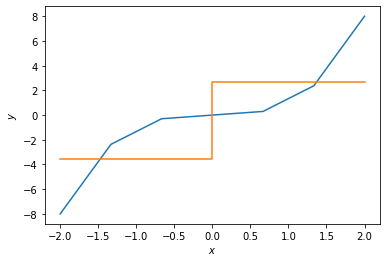

In [3]:
node1 = y[X < 0]
node2 = y[X >= 0]
node1_values = np.full(node1.shape, node1.mean())
node2_values = np.full(node2.shape, node2.mean())
values = np.concatenate((node1_values, node2_values))
plt.plot(X, y)
plt.step(X, values, where='post')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')

In [4]:
def split_tree(X, y, t):
    X_l = X[X < t]
    y_l = y[X < t]
    X_r = X[X >= t]
    y_r = y[X >= t]
    values_l = np.full(y_l.shape, y_l.mean())
    values_r = np.full(y_r.shape, y_r.mean())
    return [(X_l, y_l, values_l), (X_r, y_r, values_r)]
    

In [5]:
def regression_var_criterion(X, y, t):
    tree = split_tree(X, y, t)
    X_l, y_l, _ = tree[0]
    X_r, y_r, _ = tree[1]
    prop_l = X_l.shape[0] / X.shape[0]
    prop_r = X_r.shape[0] / X.shape[0]
    Q = D(X, y) - prop_l * D(X_l, y_l) - prop_r * D(X_r, y_r)
    return Q

def D(X, y):
    return ((y.std())**2).mean()

print(regression_var_criterion(X, y, -1.9))
print(regression_var_criterion(X, y, -1.3))
print(regression_var_criterion(X, y, 0))
print(regression_var_criterion(X, y, 1.3))
print(regression_var_criterion(X, y, 1.9))
print('Answer is 0')
        

10.666666666666666
10.754458161865566
9.481481481481481
10.754458161865566
10.666666666666666
Answer is 0


<h2>Task 2</h2>

[array([-8.]), array([-1.33333333, -1.33333333]), array([0.88888889, 0.88888889, 0.88888889]), array([8.])]
Answer is 4


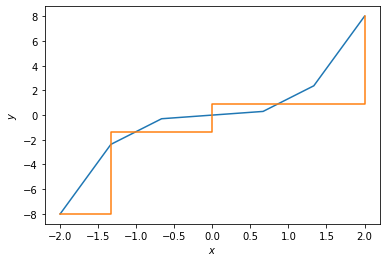

In [6]:
l, r = split_tree(X, y, 0)
l_l, l_r = split_tree(l[0], l[1], -1.5)
r_l, r_r = split_tree(r[0], r[1], 1.5)

values = np.concatenate([l_l[2], l_r[2], r_l[2], r_r[2]])
print([l_l[2], l_r[2], r_l[2], r_r[2]])

plt.plot(X, y)
plt.step(X, values, where='post')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')

print('Answer is 4')

<h2>Task 3</h2>

In [7]:
df = pd.read_csv('mlbootcamp5_train.csv', 
                 index_col='id', sep=';')

In [9]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [24]:
df['age in years'] = df['age'].apply(lambda x: int(x / 365.25))
df.drop(columns=['age'], inplace=True)
df.head()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age in years,chol_1,chol_2,chol_3,gluc_1,gluc_2,gluc_3
id,,,,,,,,,,,,,,,,,,
0,2,168,62.0,110,80,1,1,0,0,1,0,50,1,0,0,1,0,0
1,1,156,85.0,140,90,3,1,0,0,1,1,55,0,0,1,1,0,0
2,1,165,64.0,130,70,3,1,0,0,0,1,51,0,0,1,1,0,0
3,2,169,82.0,150,100,1,1,0,0,1,1,48,1,0,0,1,0,0
4,1,156,56.0,100,60,1,1,0,0,0,0,47,1,0,0,1,0,0


In [25]:
df[['chol_1','chol_2','chol_3']] = pd.get_dummies(df['cholesterol'])
df[['gluc_1','gluc_2','gluc_3']] = pd.get_dummies(df['gluc'])
df.drop(columns=['cholesterol', 'gluc'], inplace=True)
df.head()

,gender,height,weight,ap_hi,ap_lo,smoke,alco,active,cardio,age in years,chol_1,chol_2,chol_3,gluc_1,gluc_2,gluc_3
id,,,,,,,,,,,,,,,,
0,2,168,62.0,110,80,0,0,1,0,50,1,0,0,1,0,0
1,1,156,85.0,140,90,0,0,1,1,55,0,0,1,1,0,0
2,1,165,64.0,130,70,0,0,0,1,51,0,0,1,1,0,0
3,2,169,82.0,150,100,0,0,1,1,48,1,0,0,1,0,0
4,1,156,56.0,100,60,0,0,0,0,47,1,0,0,1,0,0


In [28]:
X = df.drop(columns=['cardio']).values
y = df['cardio'].values

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=17)

In [42]:
from sklearn.tree import DecisionTreeClassifier


tree = DecisionTreeClassifier(max_depth=3, 
                                  random_state=17)
tree.fit(X_train, y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=17, splitter='best')

In [32]:
import pydotplus #pip install pydotplus
from sklearn.tree import export_graphviz

def tree_graph_to_png(tree, feature_names, png_file_to_save):
    tree_str = export_graphviz(tree, feature_names=feature_names, 
                                     filled=True, out_file=None)
    graph = pydotplus.graph_from_dot_data(tree_str)  
    graph.write_png(png_file_to_save)

In [39]:
tree_graph_to_png(tree=tree, feature_names=df.drop(columns=['cardio']).columns.values, 
                  png_file_to_save='A2_task3.png')

In [40]:
print('Answer is age, ap_hi, chol=3')

Answer is age, ap_hi, chol=3


<h2>Task 4</h2>

In [41]:
from sklearn.metrics import accuracy_score
y_pred = tree.predict(X_test)
accuracy_score(y_test, y_pred)

0.7212857142857143

In [47]:
from sklearn.model_selection import GridSearchCV
tree_params = {'max_depth': list(range(2, 11))}
tree_grid = GridSearchCV(tree, tree_params,
                         cv=5, n_jobs=-1, verbose=True, return_train_score=True)
tree_grid.fit(X_train, y_train)
y_pred = tree_grid.predict(X_test)
accuracy_score(y_test, y_pred)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  45 | elapsed:    0.6s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.8s finished


0.7256666666666667

In [44]:
tree_grid.best_params_

{'max_depth': 6}

Text(0, 0.5, '$y$')

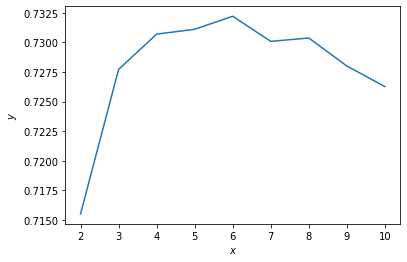

In [53]:
train_scores = tree_grid.cv_results_['mean_test_score']
plt.plot(range(2, 11), train_scores)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')

In [55]:
acc1 = accuracy_score(y_test, tree.predict(X_test))
acc2 = accuracy_score(y_test, tree_grid.predict(X_test))
print('acc1 = ', acc1)
print('acc2 = ', acc2)
effect = (acc2 - acc1) / acc1 * 100
print('effect = ', effect)


acc1 =  0.7212857142857143
acc2 =  0.7256666666666667
effect =  0.6073809995378613


In [57]:
print('There exists a local maximum of accuracy on the built validation curve: True')
print('GridSearchCV increased holdout accuracy by more than 1%: False')
print('There is no local maximum of accuracy on the built validation curve: False')
print('GridSearchCV increased holdout accuracy by less than 1%: True')

There exists a local maximum of accuracy on the built validation curve: True
GridSearchCV increased holdout accuracy by more than 1%: False
There is no local maximum of accuracy on the built validation curve: False
GridSearchCV increased holdout accuracy by less than 1%: True


<h2>Task 5</h2>

In [64]:
df['age_40-50'] = df['age in years'].apply(lambda x: int(x >= 40 and x < 50))
df['age_50-55'] = df['age in years'].apply(lambda x: int(x >= 50 and x < 55))
df['age_55-60'] = df['age in years'].apply(lambda x: int(x >= 55 and x < 60))
df['age_60-65'] = df['age in years'].apply(lambda x: int(x >= 60 and x < 65))
df

,gender,height,weight,ap_hi,ap_lo,smoke,alco,active,cardio,age in years,...,ap_hi_120,ap_hi_140,ap_hi_160,ap_hi_120-140,ap_hi_140-160,ap_hi_160-180,age_40-50,age_50-55,age_55-60,age_60-65
id,,,,,,,,,,,,,,,,,,,,,
0,2,168,62.0,110,80,0,0,1,0,50,...,0,0,0,0,0,0,0,1,0,0
1,1,156,85.0,140,90,0,0,1,1,55,...,0,1,0,0,1,0,0,0,1,0
2,1,165,64.0,130,70,0,0,0,1,51,...,1,0,0,1,0,0,0,1,0,0
3,2,169,82.0,150,100,0,0,1,1,48,...,0,1,0,0,1,0,1,0,0,0
4,1,156,56.0,100,60,0,0,0,0,47,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99993,2,168,76.0,120,80,1,0,1,0,52,...,1,0,0,1,0,0,0,1,0,0
99995,1,158,126.0,140,90,0,0,1,1,61,...,0,1,0,0,1,0,0,0,0,1
99996,2,183,105.0,180,90,0,1,0,1,52,...,0,0,0,0,0,0,0,1,0,0


In [63]:
df['ap_hi_120-140'] = df['ap_hi'].apply(lambda x: int(x >= 120 and x < 140))
df['ap_hi_140-160'] = df['ap_hi'].apply(lambda x: int(x >= 140 and x < 160))
df['ap_hi_160-180'] = df['ap_hi'].apply(lambda x: int(x >= 160 and x < 180))
df

,gender,height,weight,ap_hi,ap_lo,smoke,alco,active,cardio,age in years,...,age_40,age_50,age_55,age_60,ap_hi_120,ap_hi_140,ap_hi_160,ap_hi_120-140,ap_hi_140-160,ap_hi_160-180
id,,,,,,,,,,,,,,,,,,,,,
0,2,168,62.0,110,80,0,0,1,0,50,...,0,1,0,0,0,0,0,0,0,0
1,1,156,85.0,140,90,0,0,1,1,55,...,0,0,1,0,0,1,0,0,1,0
2,1,165,64.0,130,70,0,0,0,1,51,...,0,1,0,0,1,0,0,1,0,0
3,2,169,82.0,150,100,0,0,1,1,48,...,1,0,0,0,0,1,0,0,1,0
4,1,156,56.0,100,60,0,0,0,0,47,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99993,2,168,76.0,120,80,1,0,1,0,52,...,0,1,0,0,1,0,0,1,0,0
99995,1,158,126.0,140,90,0,0,1,1,61,...,0,0,0,1,0,1,0,0,1,0
99996,2,183,105.0,180,90,0,1,0,1,52,...,0,1,0,0,0,0,0,0,0,0


In [67]:
df

,gender,height,weight,ap_hi,ap_lo,smoke,alco,active,cardio,age in years,...,gluc_1,gluc_2,gluc_3,ap_hi_120-140,ap_hi_140-160,ap_hi_160-180,age_40-50,age_50-55,age_55-60,age_60-65
id,,,,,,,,,,,,,,,,,,,,,
0,2,168,62.0,110,80,0,0,1,0,50,...,1,0,0,0,0,0,0,1,0,0
1,1,156,85.0,140,90,0,0,1,1,55,...,1,0,0,0,1,0,0,0,1,0
2,1,165,64.0,130,70,0,0,0,1,51,...,1,0,0,1,0,0,0,1,0,0
3,2,169,82.0,150,100,0,0,1,1,48,...,1,0,0,0,1,0,1,0,0,0
4,1,156,56.0,100,60,0,0,0,0,47,...,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99993,2,168,76.0,120,80,1,0,1,0,52,...,1,0,0,1,0,0,0,1,0,0
99995,1,158,126.0,140,90,0,0,1,1,61,...,0,1,0,0,1,0,0,0,0,1
99996,2,183,105.0,180,90,0,1,0,1,52,...,1,0,0,0,0,0,0,1,0,0


In [71]:
df2 = pd.read_csv('mlbootcamp5_train.csv', 
                 index_col='id', sep=';')
df['gender'] = df2['gender']
df['gender'] = df['gender'].map({1:0, 2:1})
df

,gender,height,weight,ap_hi,ap_lo,smoke,alco,active,cardio,age in years,...,gluc_1,gluc_2,gluc_3,ap_hi_120-140,ap_hi_140-160,ap_hi_160-180,age_40-50,age_50-55,age_55-60,age_60-65
id,,,,,,,,,,,,,,,,,,,,,
0,1,168,62.0,110,80,0,0,1,0,50,...,1,0,0,0,0,0,0,1,0,0
1,0,156,85.0,140,90,0,0,1,1,55,...,1,0,0,0,1,0,0,0,1,0
2,0,165,64.0,130,70,0,0,0,1,51,...,1,0,0,1,0,0,0,1,0,0
3,1,169,82.0,150,100,0,0,1,1,48,...,1,0,0,0,1,0,1,0,0,0
4,0,156,56.0,100,60,0,0,0,0,47,...,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99993,1,168,76.0,120,80,1,0,1,0,52,...,1,0,0,1,0,0,0,1,0,0
99995,0,158,126.0,140,90,0,0,1,1,61,...,0,1,0,0,1,0,0,0,0,1
99996,1,183,105.0,180,90,0,1,0,1,52,...,1,0,0,0,0,0,0,1,0,0


In [73]:
df.columns

Index(['gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'smoke', 'alco',
       'active', 'cardio', 'age in years', 'chol_1', 'chol_2', 'chol_3',
       'gluc_1', 'gluc_2', 'gluc_3', 'ap_hi_120-140', 'ap_hi_140-160',
       'ap_hi_160-180', 'age_40-50', 'age_50-55', 'age_55-60', 'age_60-65'],
      dtype='object')

In [77]:
features = np.array(['gender', 'smoke', 'chol_1', 'chol_2', 'chol_3','ap_hi_120-140', 'ap_hi_140-160',
       'ap_hi_160-180', 'age_40-50', 'age_50-55', 'age_55-60', 'age_60-65'])

features.shape

(12,)

In [78]:
X = df[features]
y = df['cardio']

new_tree = DecisionTreeClassifier(max_depth=3, random_state=17)
new_tree.fit(X, y)
tree_graph_to_png(tree=new_tree, feature_names=features, 
                  png_file_to_save='A2_task5.png')

In [79]:
print('Answer is Systolic blood pressure from 140 to 160 (mmHg)')

Answer is Systolic blood pressure from 140 to 160 (mmHg)
